# Исследовательский анализ данных о продажах  компьютерных игр.

Интернет-магазин «Стримчик» продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Необходимо выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.
Перед нами данные до 2016 года, мы планируем кампанию на 2017 год. 



В ходе проекта мы:
- Проведем исследовательский анализ данных
- Составим портрет пользователя каждого региона
- Проверим гипотезы о равенстве средний пользовательских оценках

Описание данных:


Таблица *data* содержит информацию  о продажах игр, оценки пользователей и экспертов, жанры и платформы 


- *Name* — название игры
- *Platform* — платформа
- *Year_of_Release* — год выпуска
- *Genre* — жанр игры
- *NA_sales* — продажи в Северной Америке (миллионы проданных копий)
- *EU_sales* — продажи в Европе (миллионы проданных копий)
- *JP_sales* — продажи в Японии (миллионы проданных копий)
- *Other_sales* — продажи в других странах (миллионы проданных копий)
- *Critic_Score* — оценка критиков (максимум 100)
- *User_Score* — оценка пользователей (максимум 10)
- *Rating* — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

### Загрузим данные и изучим общую информацию.

#### Импортируем библиотеки. Считаем данные из csv-файла в датафрейм и сохраним в переменную `data`. Выведем общую информацию о файле.

In [85]:
import pandas as pd
import seaborn as sn
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from plotly.offline import init_notebook_mode, iplot
import plotly
import plotly.graph_objs as go
from scipy import stats as st

!pip install missingno
import missingno as msno

In [86]:
data = pd.read_csv('games.csv')
data

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [87]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


В исследуемых данных представлена информация о 16715 проданных играх. В таблице встречаются столбцы с значениями типа object и float64.

###  Предобработка данных

#### Заменим названия столбцов (приведем к нижнему регистру).

In [88]:
data.columns = data.columns.str.lower()

#### Преобразуем данные в нужные типы и заменим пропуски.

Выведем количество пропущенных значений в стобцах.

In [89]:
data.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

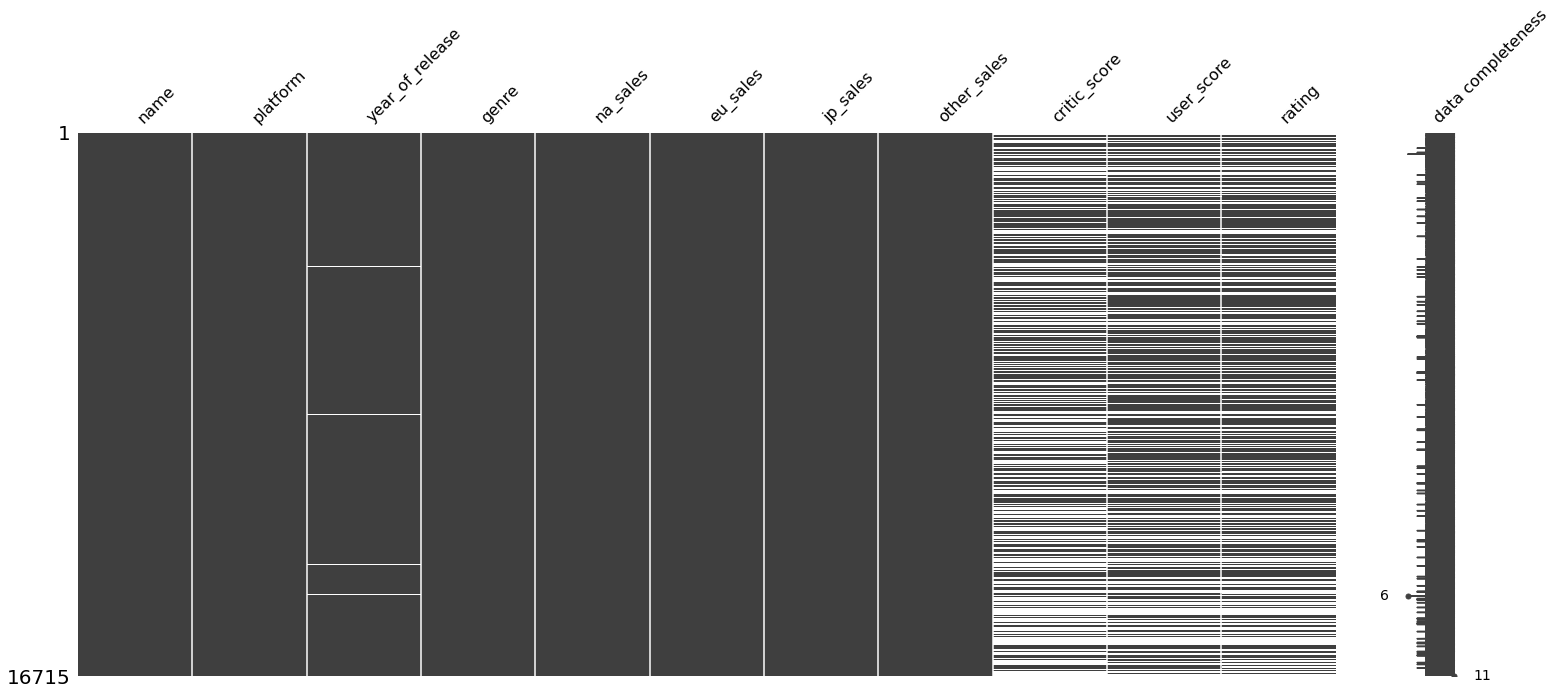

In [90]:
msno.matrix(data, labels=True);

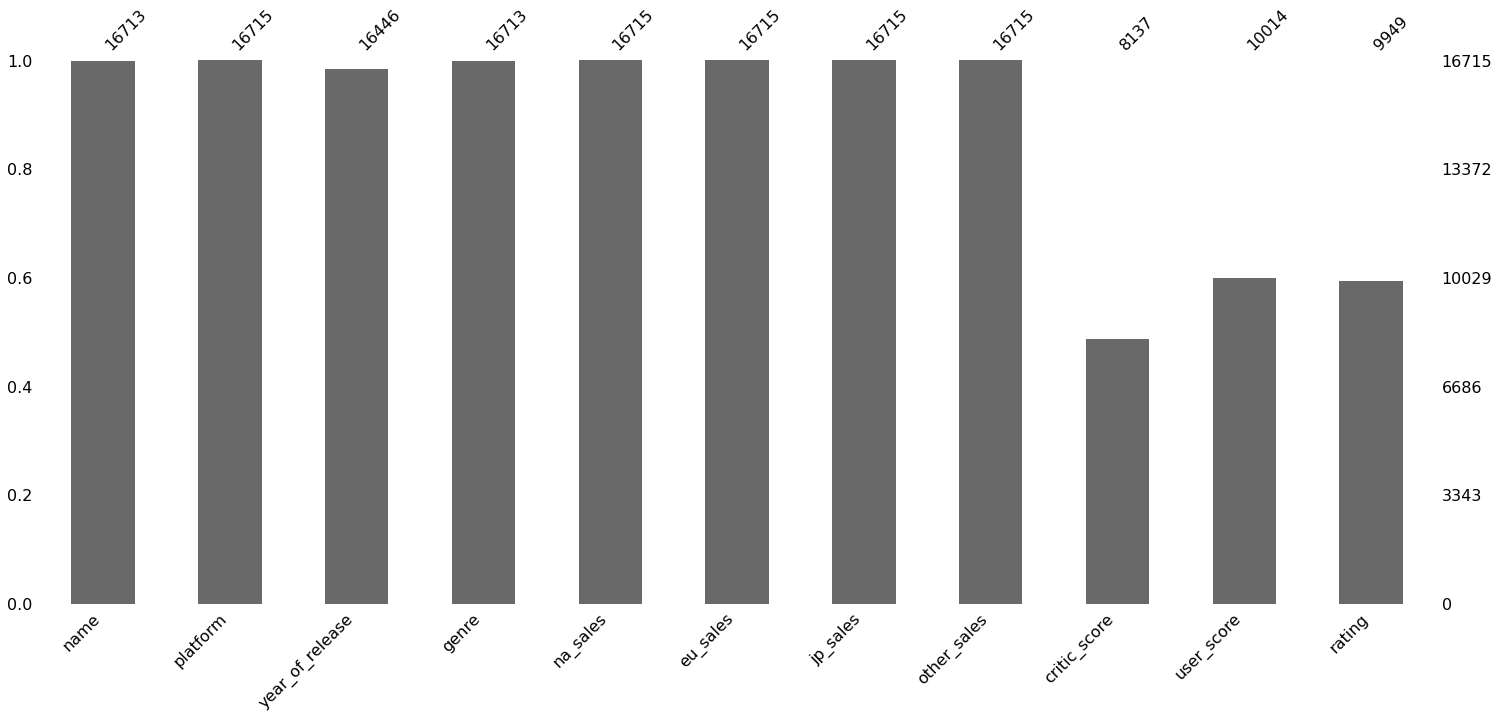

In [91]:
msno.bar(data);

В столбце *name* представлены наименования игр, в таблице имеется два пропуска, для анализа данных в данном проекте для нас не имеет значения названия, оставим пропуски без изменений. В столбцах *critic_score* , *user_score* , *rating* представлена информация об оценке критиков, пользователей и рейтинг от организаций соответственно. Пропуски в этих столбцах составляют более 35%, удаление пропущенных значений повлечет искажение данных, поэтому удалять мы их не будем, замена на медиану или среднее в данном случае будет субъективна, оставим пропущенные значения без изменений. В дальнейшем анализе будем фильтровать такие значения, где это необходимо. В стобце *year_of_release* содержится информация о годе выхода игры, пропущенные значения соствляют менее 2%. Так же данный столбец необходимо провести в нужному типу данных. Для максимального сохранения информации, заменим пропущенные значения в данном столбце на 0, преобразуем тип данных и при исследовании по годам будем фильтровать таблицу без пропущенных значений.

In [92]:
#заменим пропущенные значения в столбце year_of_release на 0
data['year_of_release'] = data['year_of_release'].fillna(0)
#преобразуем тип данных в year_of_release
data['year_of_release'] = data['year_of_release'].astype(int)

Отдельно проанализируем столбец *user_score*, в наших данных этот столбец имеет тип object. В таблице есть значения **'tbd'**, что означает to be determined - то есть оценки пока нет, но будет. Для преобразования типа данных, нам необходимо заменить такие значения на числовые, заменим их на 0 и преобразуем тип.

In [93]:
data['user_score'] = data['user_score'].replace ('tbd', 0)
data['user_score'] = data['user_score'].astype(float)

#### Добавим новый столбец с информацией о суммарных продажах во всех регионах.

In [94]:
data['sum_sales'] =  data[['na_sales','eu_sales','jp_sales', 'other_sales']].sum(axis = 1)

#### Проверим данные на явные дубликаты.

In [95]:
print('Количество явных дубликатов:', data.duplicated().sum())

Количество явных дубликатов: 0


Вывод раздела:
- В исследуемых данных представлена информация о 16715 проданных играх. В таблице встречаются столбцы с значениями типа object и float64.
- В данный отсутствуют явные дубликаты.
- В таблице есть пропущенные значения, в столбцах *critic_score , user_score , rating* пропуски составляют 35%. Оставим их без изменений, так как любая  замена будет субъективна. Причиной возникнованения пропусков могли стать несколько факторов, пользователи не обязаны, либо не хотят ставить оценки при использовании игры, так же возможно игра новая и у пользователей, и у критиков еще не сформировано мнение по данной игре. Еще одной причиной возникновения пропусков могла стать техническая сторона.

### Исследовательский анализ данных.

#### Проанализируем сколько игр выпускалось в разные года.

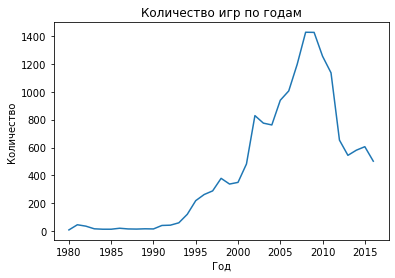

In [96]:
#создадим таблицу без пропущенных значений
game_of_year = data[data['year_of_release']!= 0]
#сгруппируем данные по годам и посчитаем сколько игр выпускалось в каждый год
game_of_year = game_of_year.pivot_table(index='year_of_release', values='name', aggfunc='count')
#переименуем столбец
game_of_year.columns = ['Количество игр']
#визуализируем данные
game_of_year.plot(legend=False);
plt.title('Количество игр по годам');
plt.xlabel('Год');
plt.ylabel('Количество');


Из графика видно, что с начала 90х годов количество игр ежегодно растет. Можно заменить резкие изменения в динамике количества появлений игр в 1994, 2002 и 2012 годах. До 1994 года игровая индустрия развивалась медленно и для анализа рынка эти данные нам малоинформативны.

#### Проанализируем, как менялись продажи по платформам. 

Выберем платформы с наибольшими суммарными продажами и постройте распределение по годам.

In [97]:
#Выведем ТОП-10 платформ по суммарным продажам
data.groupby('platform')['sum_sales'].sum().sort_values().tail(10)

platform
PC       259.52
PSP      294.05
PS4      314.14
GBA      317.85
PS       730.86
DS       806.12
Wii      907.51
PS3      939.65
X360     971.42
PS2     1255.77
Name: sum_sales, dtype: float64

Можно сделать вывод, что 6 платформ значительно отличаются от остальных по суммам продаж, проанализируем ТОП-6 этих платформ и построим распределение по годам.

In [98]:
#создадим таблицу с ТОП-6 платформ и суммами ипродаж по ним
top = data.groupby('platform')['sum_sales'].sum().sort_values(ascending = False).reset_index().head(6)
#соеденим исходных датафрейм с таблицей топ- 6, чтобы в новой таблице остались только платформы из топ-6
top_sales = data.merge(top, on='platform', how='inner')
#удалим данные с пропусками в годе выхода игры
top_sales = top_sales[top_sales['year_of_release'] != 0]
#создадим таблицу, где по каждой платформе будем сумма продаж по всем играм за каждый год
s = top_sales.pivot_table(index = 'platform', columns = 'year_of_release', values = 'sum_sales_x', aggfunc = 'sum')

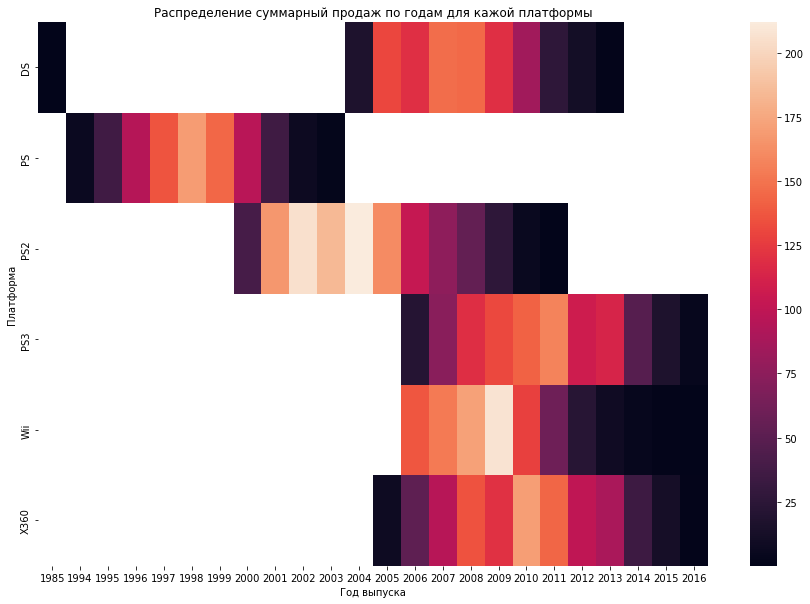

In [99]:
#визуализируем
fig, ax = plt.subplots(figsize=(15, 10))
sn.heatmap(s);
plt.title('Распределение суммарный продаж по годам для кажой платформы');
plt.xlabel('Год выпуска');
plt.ylabel('Платформа');


Из графика можно сделать вывод,что характерный срок появления новых и исчезновения старых платформ составляет в среднем 10 лет. Видно, что максимальные продажи приходятся на 3-6 года жизнедеятельности платформы, ближе в 9-10 году использования продажи падают. 

Обратим внимание, что в ТОП-6 платформ попали: PS, PS2, PS3. Это три поколения для приствок PlayStation, проследим, как они меняли по годам:
- PS 1994-2003
- PS2 2000-2011
- PS3 2006-2016
- Так же в 2013 выпущена новая версия PS4

Получается каждые 5-7 лет компания Sony выпускает новую платформу с лучшими техническими параметрами, а игры на предыдущей платформе еще существуют на рынке 3 года.
Появление на рынке новой платформы PS4 говорит от том, что она просуществует 2-4 года и топ продаж для этой платформы ожидается на 2017 год.
Актуальным периодом по продажам считаю с 2013 по 2016 год.


In [100]:
#создадим таблицу только с данными за актуальный период с 2013 по 2016 года
data_new = data[data['year_of_release'] > 2012]

#### Выясним какие платформы лидируют по продажам, растут или падают. Выберем несколько потенциально прибыльных платформ.

In [101]:
df = []

for platform in data_new['platform'].unique():
    df.append(
        go.Scatter(x=data_new[data_new.platform==platform].groupby('year_of_release')['sum_sales'].sum().index,
               y=data_new[data_new.platform==platform].groupby('year_of_release')['sum_sales'].sum(),
               name=platform)
    )
layout = {'title': 'Суммарные продажи для каждой платформы по годам'}
    
fig = go.Figure(data=df, layout=layout)
iplot(fig, show_link = False)

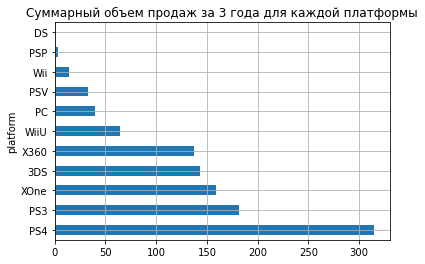

In [102]:
plt.title('Суммарный объем продаж за 3 года для каждой платформы')
(data_new
         .groupby('platform')['sum_sales'].sum()
         .sort_values(ascending=False)
         .plot(kind='barh', grid=True, legend=False)
);


ТОП-3 платформы по продажам в мире это PS4, PS3, XOne. В 2015 продажи на пике у  PS4 и XOne, так как они заменяют предыдущее поколение игровых приставок. На убыль идут приставки предыдущего поколения PS3 и X360.
Максимальная суммарная продажа была у платформы PS4 в 2015 году и составила почти 119 млн проданных копий. 

Таким образом потенциально прибыльными платформами можно считать PS4 и XOne, их "жизненный цикл" только начался, данные платформы пришли на смену предыдущих и в будущем можно ожидать увеличение прибыли от них.



#### Построим график «ящик с усами» по глобальным продажам игр в разбивке по платформам за актуальный период. 

По графику выше можно сделать вывод что лидерами продаж являются пять платформ: PS4, PS3, XOne, 3DS, X360. Отфильтруем данные и построим график «ящик с усами» по глобальным продажам игр для ТОП-5 лидеров продаж.

In [103]:
#создадим таблицу с информацией о ТОП-5 платформах
top_platforms = data[data['platform'].isin(['PS4','X360','PS3','XOne','3DS'])]

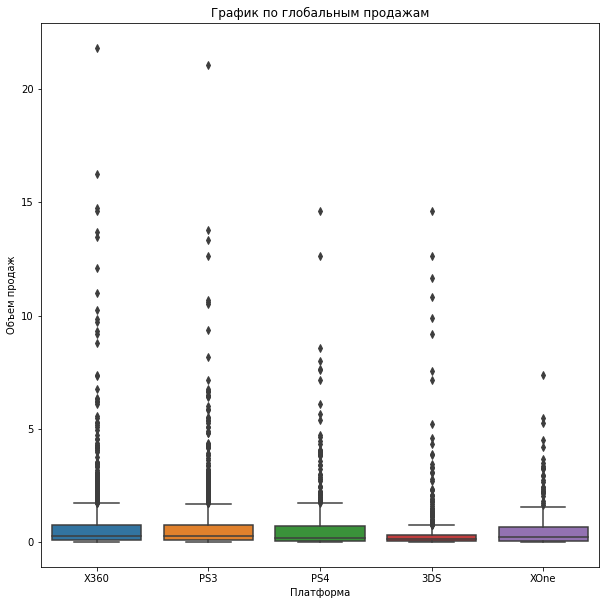

In [104]:
plt.figure(figsize=(10,10))
sns.boxplot(data=top_platforms, x='platform', y='sum_sales')
plt.title('График по глобальным продажам')
plt.xlabel('Платформа')
plt.ylabel('Объем продаж');

На графике есть аномальные выбросы практически у всех платформ, сделаем дополнительный график, ограничивающий выбросы.

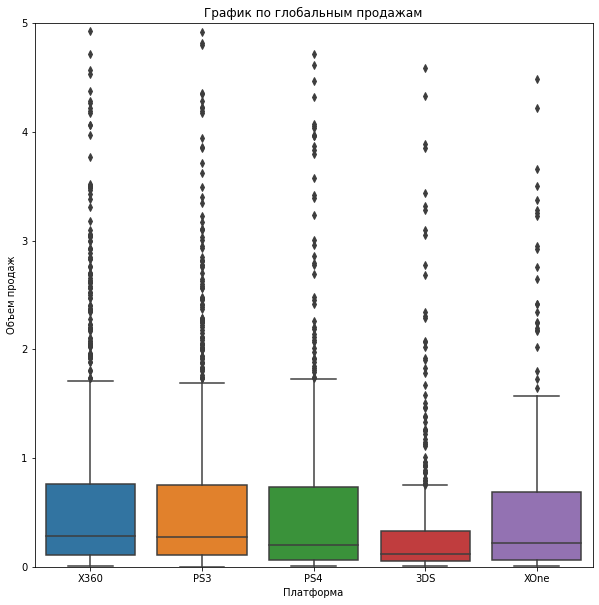

In [105]:
plt.figure(figsize=(10,10))
sns.boxplot(data=top_platforms, x='platform', y='sum_sales')
plt.title('График по глобальным продажам')
plt.xlabel('Платформа')
plt.ylabel('Объем продаж')
#ограничим ось у , тк у платформ есть выброс , который делает график не информативным
plt.ylim (0,5);

Анализируя график можно сделать вывод, что на всех платформах есть аномальные выбросы. Можно отметить, что аномальнo крупные продажи были у X360 и PS3.

#### Проанализируем, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. 

Построим диаграмму рассеяния и посчитаем корреляцию между отзывами и продажами на примере платформы PS4

In [106]:
data_ps = data[data['platform'] == 'PS4']
#создадим таблицу лишь с столбцами суммы, и оценки пользователей и критиков
data_ps = data_ps.loc[:, ['sum_sales', 'critic_score', 'user_score']]

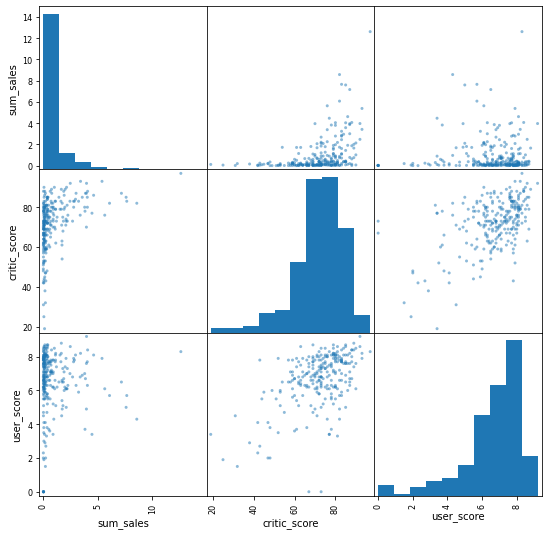

In [107]:
#Построим матрицу рассеяния
pd.plotting.scatter_matrix(data_ps, figsize=(9, 9));

In [108]:
#матрица корреляции
data_ps.corr()

,sum_sales,critic_score,user_score
sum_sales,1.000000,0.406568,0.023279
critic_score,0.406568,1.000000,0.520752
user_score,0.023279,0.520752,1.000000


Можно сделать вывод, что оценки критиков влияют на продажи. При высокой оценке игра лучше продается. Сильной зависимости между оценкой игроков и продажами нет. Стоит заметить, что на оценку игроков влияют критики, Чем выше оценка критика, тем выше мнение игрока.



Проверим наши выводы с продажами игр на других платформах. Построим графики для X360 и DS.

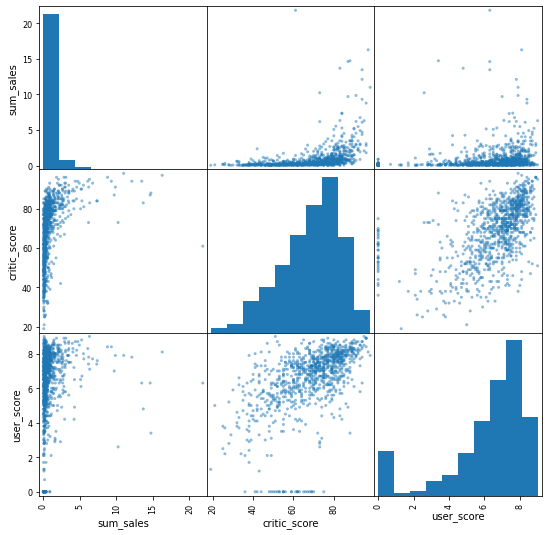

In [109]:
data_ps = data[data['platform'] == 'X360']
#создадим таблицу лишь с столбцами суммы, и оценки пользователей и критиков
data_ps = data_ps.loc[:, ['sum_sales', 'critic_score', 'user_score']]
#Построим матрицу рассеяния
pd.plotting.scatter_matrix(data_ps, figsize=(9, 9));

In [110]:
#матрица корреляции
data_ps.corr()

,sum_sales,critic_score,user_score
sum_sales,1.000000,0.393736,0.166731
critic_score,0.393736,1.000000,0.545538
user_score,0.166731,0.545538,1.000000


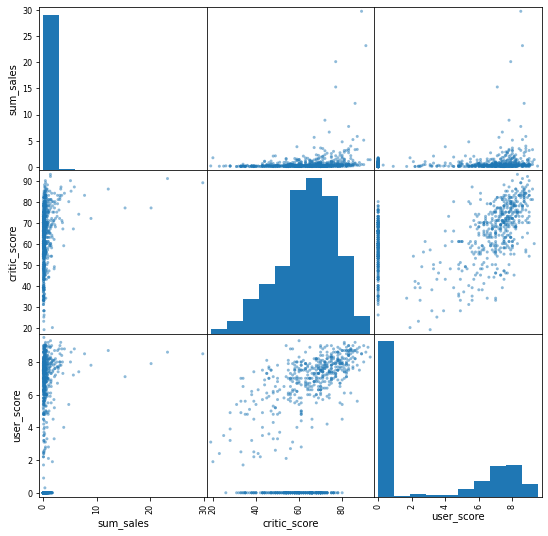

In [111]:
data_ps = data[data['platform'] == 'DS']
#создадим таблицу лишь с столбцами суммы, и оценки пользователей и критиков
data_ps = data_ps.loc[:, ['sum_sales', 'critic_score', 'user_score']]
#Построим матрицу рассеяния
pd.plotting.scatter_matrix(data_ps, figsize=(9, 9));

In [112]:
#матрица корреляции
data_ps.corr()

,sum_sales,critic_score,user_score
sum_sales,1.000000,0.236379,0.227980
critic_score,0.236379,1.000000,0.445258
user_score,0.227980,0.445258,1.000000


Наши выводы подтверждаются, на платформах X360 и DS имеются похожие тенденции как и у PS4.

#### Проанализируем  общее распределение игр по жанрам. 

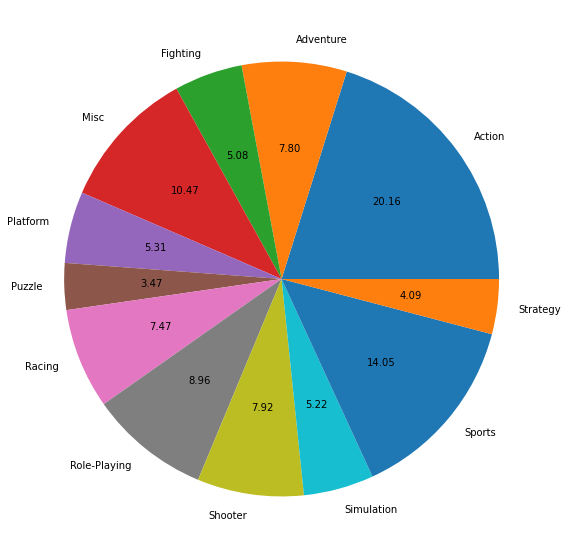

In [113]:
data_genre = data.groupby('genre')['name'].count()
genres = data_genre.index
plt.figure(figsize=(25,10))
plt.pie(x=data_genre, labels=genres, autopct="%.2f")
plt.show()

В представленных данных более 20% это игры жанра Action, Так же популярны игры жанра Sports, их доля равна 14% и Misc - почти 11%. Доли остальных жанров не более 10%.

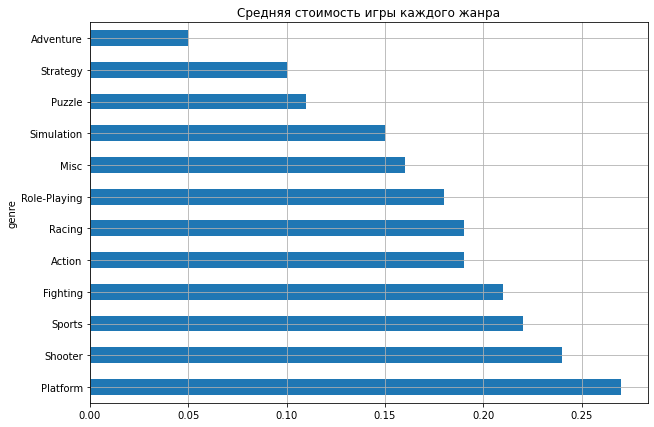

In [114]:
plt.figure(figsize=(10, 7));
plt.title('Средняя стоимость игры каждого жанра');
(data
         .groupby('genre')['sum_sales'].median()
         .sort_values(ascending=False)
         .plot(kind='barh', grid=True, legend=False)
);
#используем медиану, тк возможы выбросы в стоимости отдельной игры, что може изказить среднее

Самая дорогая средняя стоимость одной игры у жанра Platform, так же дорогими являются Fighting, Sports и Shooter. Средняя стоимость игры у жанра Adventure значительно ниже остальных жанров.

### Составим портрет пользователя каждого региона.


#### В таблице представлены пользователи из трех регионов: Северная Америка, Европа и Япония. Найдем ТОП-5 платформ для каждого региона.

In [115]:
#Создадим функцию для создания портрета пользователя 
def user_portrait(item, row):
    s = data.groupby(item)[row].sum().sort_values(ascending=False).head(5)
    return s

In [116]:
#создадим функцию для визуализации портрета
def vizual__portrait(a,b,c, tittle):
    fig = plt.figure(figsize=(15, 6))
    ax1 = fig.add_subplot(1, 3, 1)
    ax2 = fig.add_subplot(1, 3, 2)
    ax3 = fig.add_subplot(1, 3, 3)
    ax1.bar(a.index, a);
    ax1.set_title('Северная Америка')
    ax2.bar(b.index, b);
    ax2.set_title('Европа')
    ax3.bar(c.index, c);
    ax3.set_title('Япония')
    fig.suptitle(tittle)
    plt.show()

In [117]:
# для каждого региона применим функцию создание портрета
na_platform = user_portrait('platform', 'na_sales')
eu_platform = user_portrait('platform', 'eu_sales')
jp_platform = user_portrait('platform', 'jp_sales')

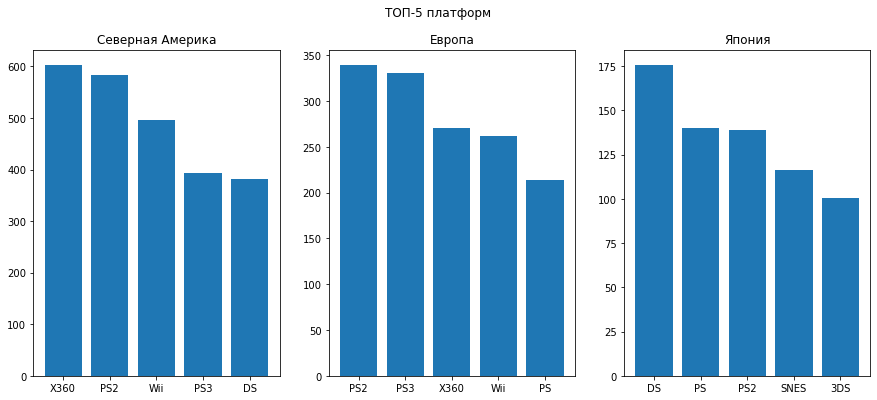

In [118]:
#применим функцию визуализации
vizual__portrait(na_platform, eu_platform, jp_platform, 'ТОП-5 платформ')

В Северной Америке самая популярная платформа X360. Европейцы предпочитают PS2ю В Японии популярны DS.

#### Найдем самые популярные жанры для каждого региона.

In [119]:
# для каждого региона применим функцию создание портрета
na_genre = user_portrait('genre', 'na_sales')
eu_genre = user_portrait('genre', 'eu_sales')
jp_genre = user_portrait('genre', 'jp_sales')

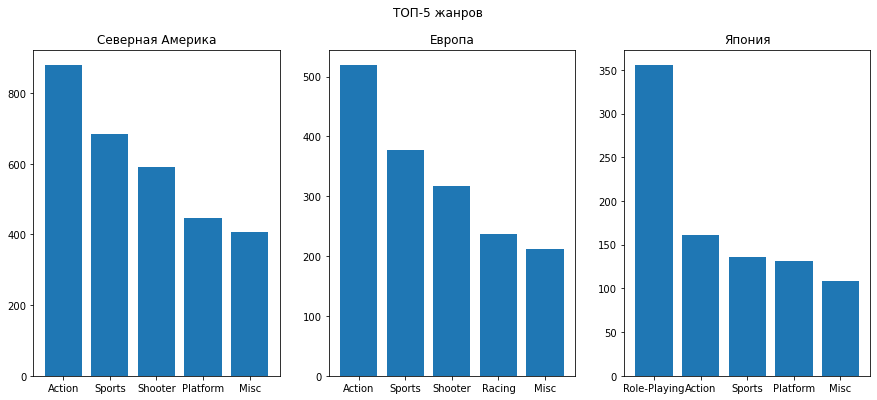

In [120]:
#применим функцию визуализации
vizual__portrait(na_genre, eu_genre, jp_genre, 'ТОП-5 жанров')

Жанровые предпочтения Европейцев и Американцев практически совпадают. Самый популярный жанр у низ это Action, так же жители этих регионов предпочитают Sports и Shooter. Предпочтения в Японии отличаются от остальных, самым популярным жанром здесь является Role-Playing. Последнее место в ТОП5 жанров у всех регионов занимает Misc.

#### Проанализируем влияет ли рейтинг ESRB на продажи в отдельном регионе.

In [121]:
# для каждого региона применим функцию создание портрета
na_raiting = user_portrait('rating', 'na_sales')
eu_raiting = user_portrait('rating', 'eu_sales')
jp_raiting = user_portrait('rating', 'jp_sales')

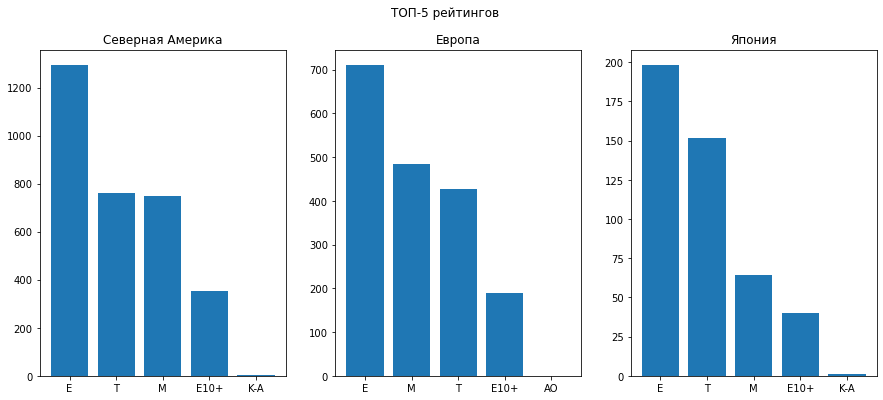

In [122]:
#применим функцию визуализации
vizual__portrait(na_raiting, eu_raiting, jp_raiting, 'ТОП-5 рейтингов')

Во всех представленных регионах самыми продаваемыми являются игры с рейтингои "Е"-для всех возрастов. Так же во всех странах в тройку лидеров входят игры для пользователей старше 13(рейтинг Т) и страше 17 лет (рейтинг М). При прогнозировании продаж необходимо учитывать региональные особенности.

### Проверка гипотез.

#### Проверим, одинаковы ли средние пользовательские рейтинги платформ Xbox One и PC.
Сформулируем  гипотезы:

Нулевая гипотеза H₀: Средние пользовательские рейтинги платформ Xbox One и PC одинаковые


Альтернативная гипотеза H₁: Средние пользовательские рейтинги платформ Xbox One и PC разные


Установим уровень статистичекой значимости равный 0,05.

In [123]:
# отфильтруем данные по каждой платформе
data_xbox =data[data['platform'] == 'XOne']
data_PC =data[data['platform'] == 'PC']
data_xbox = data_xbox['sum_sales']
data_PC = data_PC['sum_sales']

In [124]:
alpha = 0.05 
results = st.ttest_ind(data_xbox, data_PC, equal_var = False)
results.pvalue
print('p-значение:', results.pvalue)
if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 1.0196533966248761e-07
Отвергаем нулевую гипотезу


Средняя оценка пользователей платформы XBox One отличается от средней оценки пользователей платформы PC. Нулевую гипотезу отвергаем.

####  Проверим, разные ли cредние пользовательские рейтинги жанров Action  и Sports.
Сформулируем гипотезы:

Нулевая гипотеза H₀: Средние пользовательские рейтинги жанров Action  и Sports разные

Альтернативная гипотеза H₁: Средние пользовательские рейтинги жанров Action  и Sports одинаковые

Установим уровень статистичекой значимости равный 0,05.

In [125]:
# отфильтруем данные по каждому жанру
data_action =data[data['genre'] == 'Action']
data_sports =data[data['genre'] == 'Sports']
data_action = data_action['sum_sales']
data_sports = data_sports['sum_sales']

In [126]:
alpha = 0.05 
results = st.ttest_ind(data_action, data_sports, equal_var = False)
results.pvalue
print('p-значение:', results.pvalue)
if results.pvalue < alpha:
    print("Не получилось отвергнуть нулевую гипотезу")
else:
    print("Отвергаем нулевую гипотезу")

p-значение: 0.29801906118531296
Отвергаем нулевую гипотезу


Гипотезу о том, что  cредние пользовательские рейтинги жанров Action и Sports разные отвергаем.

### Вывод.

В результате исследования можно сделать вывод:


1. С начала 90х годов количество игр ежегодно растет. Можно заменить резкие изменения в динамике количества появлений игр в 1994, 2002 и 2012 годах. До 1994 года игровая индустрия развивалась медленно и для анализа рынка эти данные нам малоинформативны.
2. Существует ТОП-6 платформ значительно отличающихся от остальных по суммам продаж, это PS2, X360, PS3, Wii, DS, PS.
3. Срок появления новых и исчезновения старых платформ составляет в среднем 10 лет. Максимальные продажи приходятся на 3-6 года жизнедеятельности платформы, ближе в 9-10 году использования продажи падают. Каждые 5-7 лет компания Sony выпускает новую платформу с лучшими техническими параметрами, а игры на предыдущей платформе еще существуют на рынке 3 года.
Появление на рынке новой платформы PS4 говорит от том, что она просуществует 2-4 года и топ продаж для этой платформы ожидается на 2017 год.
4. ТОП-3 платформы по продажам в мире это PS4, PS3, XOne.  В 2015 продажи на пике у  PS4 и XOne, так как они заменяют предыдущее поколение игровых приставок. На убыль идут приставки предыдущего поколения PS3 и X360. Максимальная суммарная продажа была у платформы PS4 в 2015 году и составила почти 119 проданных копий. 

Таким образом потенциально прибыльными платформами можно считать PS4 и XOne, их "жизненный цикл" только начался, данные платформы пришли на смену предыдущих и в будущем можно ожидать увеличение прибыли от них.

5. На всех платформах есть аномальные выбросы. Можно отметить, что аномальнo крупные продажи были у X360 и PS3.
6. Оценки критиков влияют на продажи. При высокой оценке игра лучше продается. Сильной зависимости между оценкой игроков и продажами нет. Стоит заметить, что на оценку игроков влияют критики, Чем выше оценка критика, тем выше мнение игрока.
7. В представленных данных более 20% это игры жанра Action. Так же популярны игры жанра Sports, их доля равна 14% и Misc - почти 11%. Доли остальных жанров не более 10%.
8. Больше всего продаж у игр жанра Action, это связано с тем, что игр данного жанра выпускается больше всех остальных.Игр жанра Sports так же большой объем и по количеству выпускаемых игр и по продажам. Стоит обратить внимание, что игры жанра Shooter неожиданно стоят на третьем месте по продажам, хотя игр производится почти в два раза меньше. Неожиданно, что Adventure сильно отстаёт по продажам, хотя игр выпускается много. Самая дорогая средняя стоимость одной игры у жанра Platform, так же дорогими являются Fighting, Sports и Shooter. Средняя стоимость игры у жанра Adventure значительно ниже остальных жанров.
9. В Северной Америке самая популярная платформа X360. Европейцы предпочитают PS2ю В Японии популярны DS.
10. Жанровые предпочтения Европейцев и Американцев практически совпадают. Самый популярный жанр у них это Action, так же жители этих регионов предпочитают Sports и Shooter. Предпочтения в Японии отличаются от остальных, самым популярным жанром здесь является Role-Playing. Последнее место в ТОП5 жанров у всех регионов занимает Misc.
11. Во всех представленных регионах самыми продаваемыми являются игры с рейтингои "Е"-для всех возрастов. Так же во всех странах в тройку лидеров входят игры для пользователей старше 13(рейтинг Т) и страше 17 лет (рейтинг М).
14. Средняя оценка пользователей платформы XBox One отличается от средней оценки пользователей платформы PC. Нулевую гипотезу отвергаем.
15. Гипотезу о том, что cредние пользовательские рейтинги жанров Action и Sports разные отвергаем.